![Telecom Customer](telecome.jpg)

# Tabla de Contenido

1. [Introducción](#Introducción)
2. [Transformación y limpieza de datos](#Transformación-y-limpieza-de-datos)
3. [Exploración y Análisis estadístico](#Exploración-y-Análisis-estadístico)
4. [Modelado](#Definición-de-Modelos)
4. [Conclusiones](#Conclusiones)

# Introducción

Acerca del conjunto de datos

- Este conjunto de datos contiene información detallada sobre los clientes de una empresa de telecomunicaciones, incluidos datos demográficos, suscripciones a servicios, información de facturación y estado de rotación. Recoge aspectos clave como si un cliente tiene servicios telefónicos o de Internet, su permanencia en la empresa, el uso de servicios adicionales como la seguridad en línea y los métodos de pago elegidos. El conjunto de datos es especialmente útil para analizar patrones y factores que contribuyen a la pérdida de clientes, lo que ayuda a la empresa a comprender y, potencialmente, mitigar las razones de su abandono.


El conjunto de datos incluye información sobre:

- Los clientes que se han dado de baja en el último mes (la columna se denomina Churn).
- Servicios contratados por cada cliente: teléfono, varias líneas, Internet, seguridad en línea, copias de seguridad en línea, protección de dispositivos, asistencia técnica y streaming de TV y películas.
- Información sobre la cuenta del cliente: antigüedad, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.
- Información demográfica sobre los clientes: sexo, rango de edad y si tienen pareja o personas a su cargo.

##### Variables

- customerID
- gender
- SeniorCitizen      
- Partner 
- Dependents 
- tenure  
- PhoneService 
- MultipleLines
- InternetService 
- OnlineSecurity
- OnlineBackup 
- DeviceProtection 
- TechSupport 
- StreamingTV 
- StreamingMovies
- Contract 
- PaperlessBilling
- PaymentMethod 
- MonthlyCharges
- TotalCharges 
- numAdminTickets 
- numTechTickets  
- Churn     

##### Fuente:
https://www.kaggle.com/datasets/tarekmuhammed/telecom-customers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# lectura del dataset

df = pd.read_excel('Telecom_Churn.xlsx')

In [3]:
pd.set_option('display.max_columns', 100)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Notas

- Se observan que están muchas variables como categoricas, lo cual podría no ser muy adecuado para el entrenamiento del modelo.

## Transformación y limpieza de datos

In [5]:
# Lista de columnas a convertir
columnas_a_convertir = ['gender', 'Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


# Convertir directamente en cada columna, reemplazando los valores
for columna in columnas_a_convertir:
    df[columna] = df[columna].astype('category').cat.codes



In [6]:
# Convertir valores en blanco a NaN, y luego reemplazar NaN con 0
df['TotalCharges'].replace('', np.nan, inplace=True)  # Reemplaza los valores en blanco por NaN

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

In [8]:
df['TotalCharges'] = df['TotalCharges'].astype(float)  # Asegura que la columna sea numérica

In [9]:
df['TotalCharges'].dtypes

dtype('float64')

In [10]:
# añadir columna de años de permanencia

df['Años_contrato'] = round(df['tenure']/12)

In [43]:
df['Contract_cat'] = df['Contract'].astype('category').cat.codes

In [44]:
# consulta del estado del data frame

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Años_contrato,Contract_cat
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0.0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0,0,3.0,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,0,0,1,0.0,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,3,0,4.0,1
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,0,0,1,0.0,0


In [12]:
# consulta del tipo de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int8   


In [13]:
# consulta de valores duplicados

df.duplicated().sum()

0

In [80]:
# consulta de valores nulos

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
Años_contrato        0
Contract_cat         0
dtype: int64

In [82]:
# remplalzar valores nulos en la columna de TotalCharges

media_totalcharge=df['TotalCharges'].astype('float').mean(axis=0)
df["TotalCharges"].replace(np.nan, media_totalcharge, inplace=True)

## Exploración y Análisis estadístico

In [83]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Años_contrato,Contract_cat
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.592219,64.761692,2283.300441,0.515689,0.419566,0.265370,2.684793,0.690473
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.491457,30.090047,2265.000258,1.275299,1.250117,0.441561,2.117208,0.833755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,1400.550000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,89.850000,3786.600000,0.000000,0.000000,1.000000,5.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,5.000000,9.000000,1.000000,6.000000,2.000000


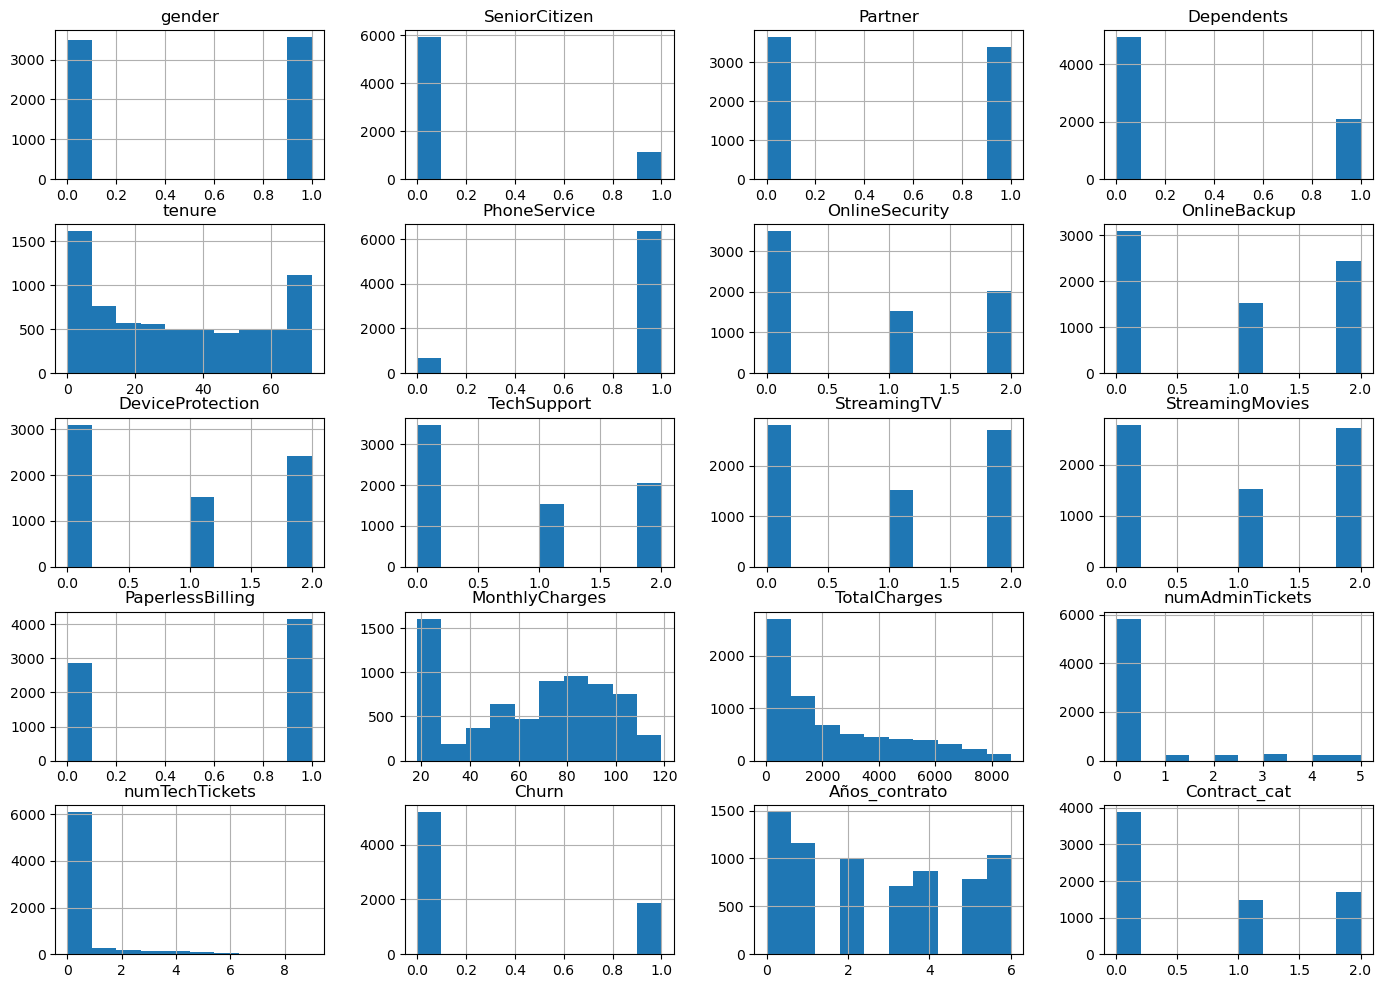

In [84]:
# histograma valores numéricos


df.hist(figsize=(17,12))
plt.show()

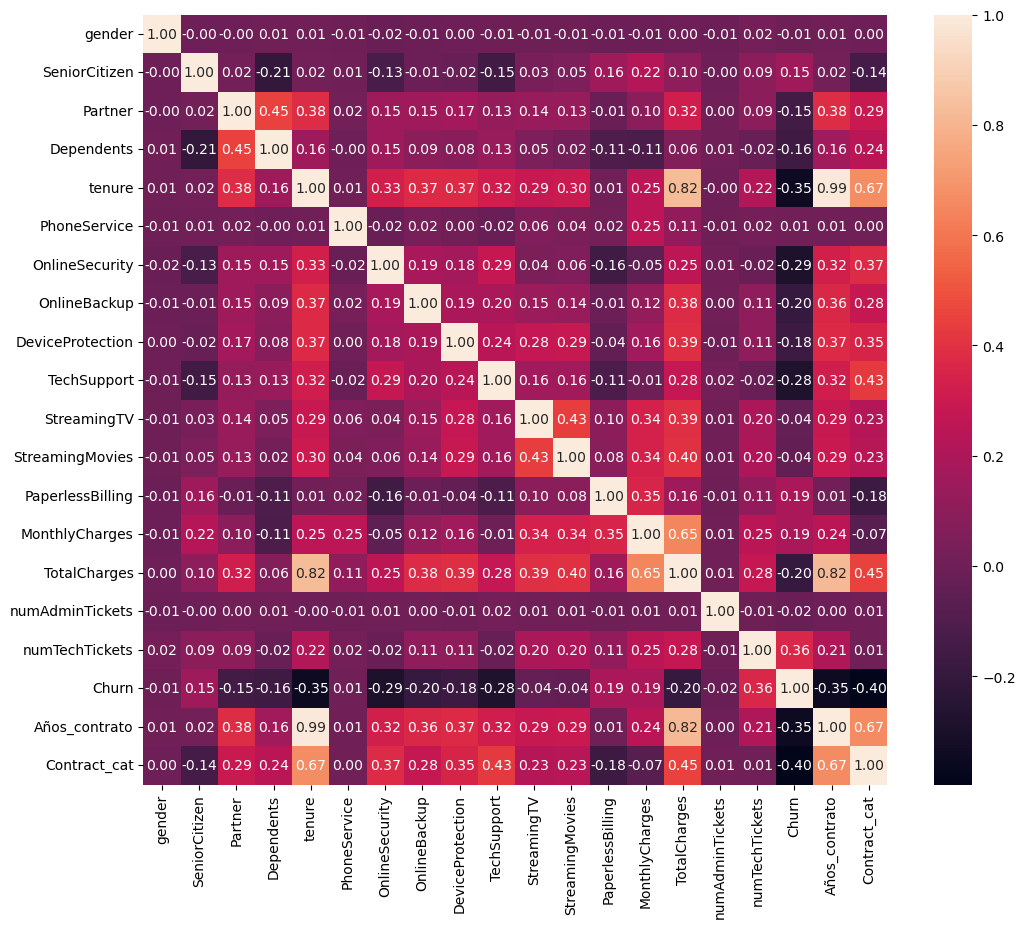

In [85]:
# observación de correlación entre variables numéricas

plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True, fmt=".2f")
plt.show()

#### Nota

 En la gráfica anterior, se observa una correlación ascendentre entre la variable Churn:
- SeniorCitizen
- PapperlesBilling
- MonthlyCharges
- numTechTickets

También están teniendo una correlación descendente con la variable Churn:
- Partner
- Dependents
- tenure
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- Años_contrato


#### Gráficas y exploración de variables

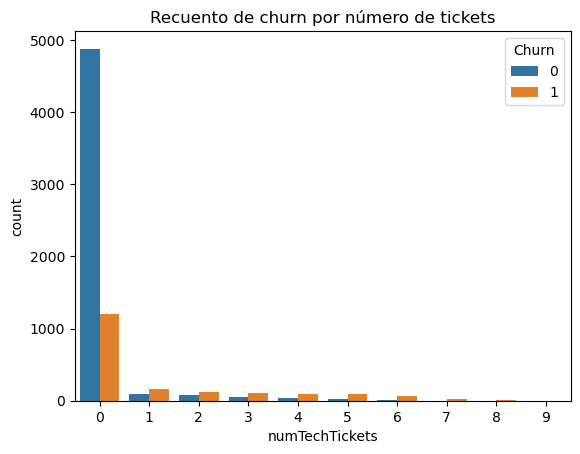

In [18]:
sns.countplot(data=df, x='numTechTickets', hue='Churn')
plt.title('Recuento de churn por número de tickets')
plt.show()

- En la anterior gráfica, al parecer los principales clientes que igualmente se han dado de baja; no es debido al número de tickets generados. No obstante, si que se observa que los usuarios que tienen más de 1 techticket muestran una mayor tendencia a darse de baja.

C:\Users\gemas\data\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


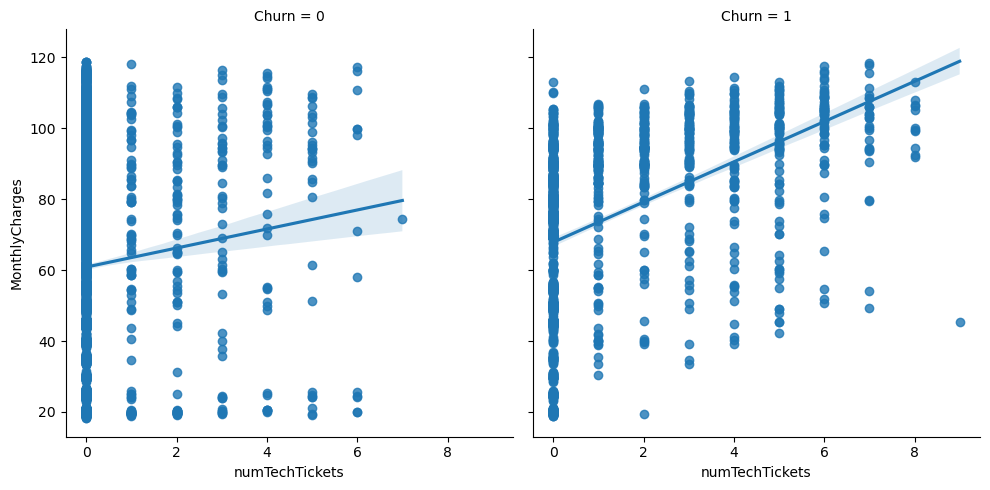

In [19]:
sns.lmplot(data=df, x='numTechTickets', y='MonthlyCharges', col='Churn')
plt.show()

- Al observar la gráfica anterior, vemos que los clientes que se han dado baja muestran una tendencia ascendente entre el número de tickets y el coste del pago mensual.

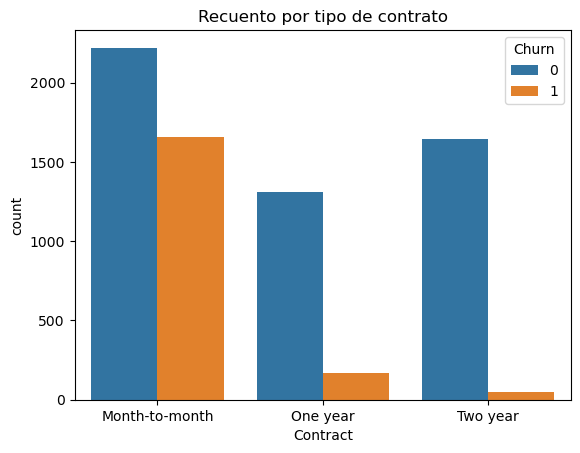

In [20]:
# baja tipo de contrato

sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Recuento por tipo de contrato')
plt.show()

- Se observa que son mayores los usuarios que se dan de baja con un tipo de contrato de mes a mes. Mientras que en los contratos de mayor duración (1 año y 2 años) se dan de baja muchos menos.

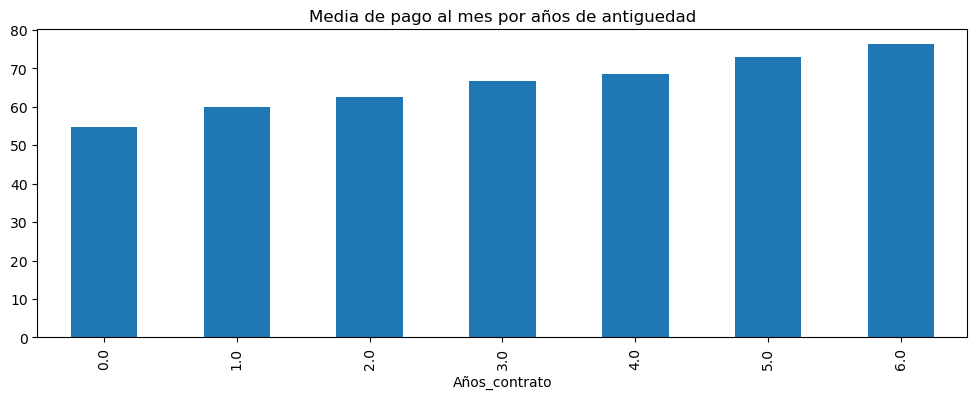

In [21]:
pago= df.groupby('Años_contrato')['MonthlyCharges'].mean()
plt.figure(figsize=(12,4))
pago.plot(kind='bar')
plt.title('Media de pago al mes por años de antiguedad')
plt.show()

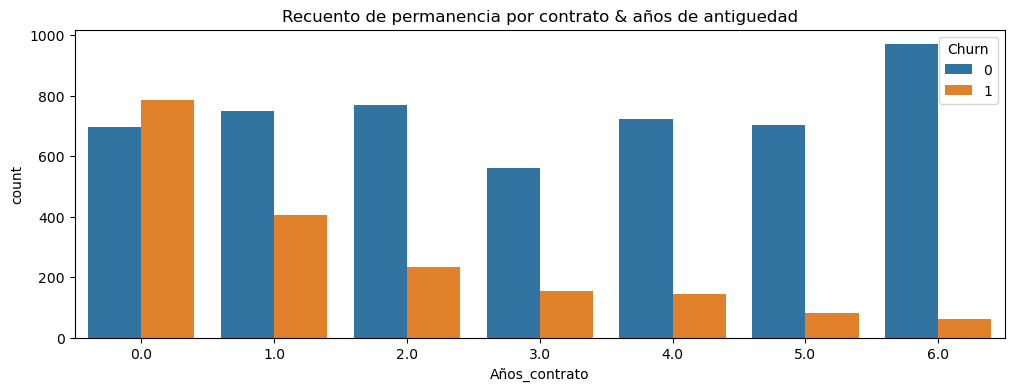

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Años_contrato', hue='Churn')
plt.title('Recuento de permanencia por contrato & años de antiguedad')
plt.show()

- Al analizar las 2 gráficas anteriores, se observa que aunque los usuarios de mayor antiguedad tengan una media de gasto superior a los 70 €, la tendencia a darse de baja en el servicio es mayor en aquellos clientes que no llegan a permanecer un 1 año. 
###### ¿Puede ser que aquellos clientes con un tipo de contrato de mes a mes, muestran mayor tendencia a no mantener el contrato más de 1 año y a darse de baja?


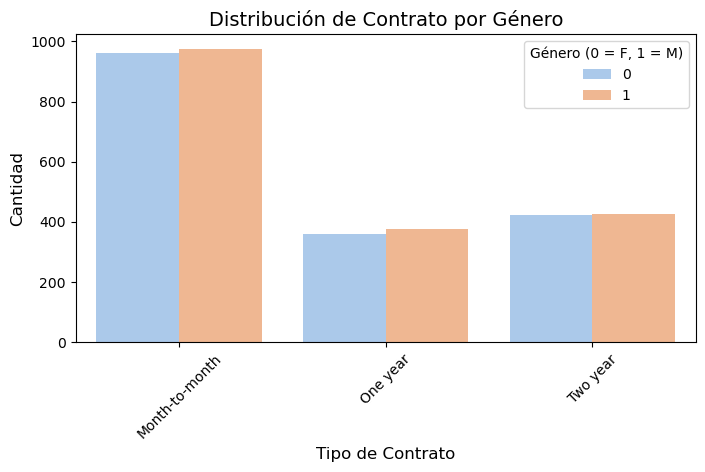

In [42]:
# Agrupación de datos

grouped = df.groupby(['gender', 'Contract', 'Churn']).size().reset_index(name='count')

# Creación de gráfica de barras

plt.figure(figsize=(8, 4))
sns.barplot(
    data=grouped,
    x="Contract",
    y="count",
    hue="gender",
    dodge=True,
    palette="pastel",
    errorbar=None
)

# Añadir títulos y etiquetas
plt.title("Distribución de Contrato por Género", fontsize=14)
plt.xlabel("Tipo de Contrato", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Género (0 = F, 1 = M)", loc="upper right")
plt.show()

- Al observar la gráfica anterior, se observa una ligera diferencia; resultando en más cantidad de hombres que de mujeres en los diferentes tipos contratos.
- Así mismo, la tipología de contrato más demandada es la de més a mes

## Definición de Modelos

In [47]:
# libreria xgb

import xgboost as xgb

In [62]:
from xgboost import plot_importance

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, jaccard_score

In [54]:
from sklearn.model_selection import GridSearchCV

In [86]:
# filtrado de variables categoricas de numéricas

df_num = df.select_dtypes(exclude='object')

In [87]:
df_num

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Años_contrato,Contract_cat
0,0,0,1,0,1,0,0,2,0,0,0,0,1,29.85,29.85,0,0,0,0.0,0
1,1,0,0,0,34,1,2,0,2,0,0,0,0,56.95,1889.50,0,0,0,3.0,1
2,1,0,0,0,2,1,2,2,0,0,0,0,1,53.85,108.15,0,0,1,0.0,0
3,1,0,0,0,45,0,2,0,2,2,0,0,0,42.30,1840.75,0,3,0,4.0,1
4,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,0,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,2,2,2,1,84.80,1990.50,0,0,0,2.0,1
7039,0,0,1,1,72,1,0,2,2,0,2,2,1,103.20,7362.90,0,5,0,6.0,1
7040,0,0,1,1,11,0,2,0,0,0,0,0,1,29.60,346.45,0,0,0,1.0,0
7041,1,1,1,0,4,1,0,0,0,0,0,0,1,74.40,306.60,0,0,1,0.0,0


In [88]:
# separación variables independientes - dependientes

X = df_num.drop(['Churn'], axis=1)
y= df_num['Churn']

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [90]:
modelo_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes)

In [91]:
num_classes = len(set(y))
print(f"Number of classes: {num_classes}")

Number of classes: 2


In [92]:
param_grid = {
    'max_depth': [1, 2, 3, 4],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1]
}

# clasificación del tipo de modelo

algGrid = GridSearchCV(modelo_xgb,param_grid,verbose=1,refit=True)

In [93]:
modelo_xgb2 = algGrid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [94]:
# Mejor modelo encontrado por GridSearchCV

best_model = modelo_xgb2.best_estimator_

In [95]:
# predicciones
prediction_test = best_model.predict(X_test)
prediction_train = best_model.predict(X_train)

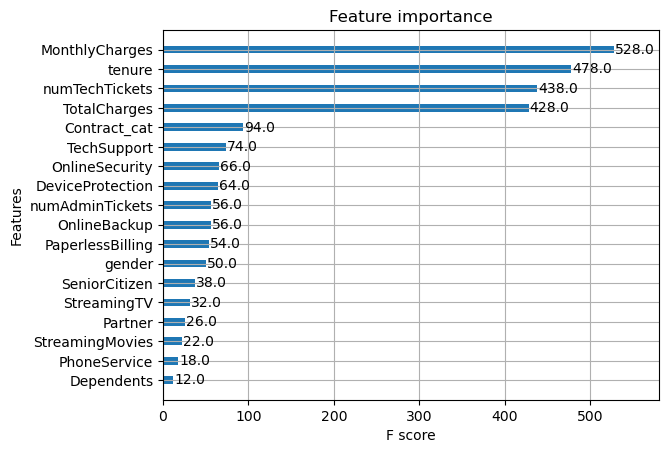

In [96]:
# consulta de las variables más importantes

xgb.plot_importance(best_model, height=0.4)
plt.show()

In [97]:
xg_Accuracy_Score = metrics.accuracy_score(prediction_test, y_test)
xg_JaccardIndex = metrics.jaccard_score(prediction_test, y_test)
xg_F1_Score = metrics.f1_score(prediction_test, y_test)
xg_Log_Loss = metrics.log_loss(prediction_test, y_test)

print('Accuracy:', xg_Accuracy_Score)
print('Jaccard:', xg_JaccardIndex)
print('F1_Score:', xg_F1_Score)
print('Log_Loss:', xg_Log_Loss)

Accuracy: 0.8687012065294535
Jaccard: 0.5766590389016019
F1_Score: 0.7314949201741654
Log_Loss: 4.732488202261656


In [98]:
df_num.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets',
       'Churn', 'Años_contrato', 'Contract_cat'],
      dtype='object')

### Modelo de Regresión Logística

In [99]:
# definición de variables

X = df[['MonthlyCharges','tenure','TotalCharges','numTechTickets']]
y = df['Churn']

In [100]:
# separación de datos

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 1)

In [101]:
# definir el modelo

modeloLR = LogisticRegression()

In [102]:
# entrenar el modelo

mod_fitLR = modeloLR.fit(X_train, y_train)

In [103]:
# predecir resultados

mod_predLR = mod_fitLR.predict(X_val)

In [104]:
# Calcular 

LR_Accuracy_Score = metrics.accuracy_score(mod_predLR, y_val)
LR_JaccardIndex = metrics.jaccard_score(mod_predLR, y_val)
LR_F1_Score = metrics.f1_score(mod_predLR, y_val)
LR_Log_Loss = metrics.log_loss(mod_predLR, y_val)

In [105]:
# Informe de clasificación

print("Informe de clasificación:\n", classification_report(y_val, mod_predLR))

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1061
           1       0.71      0.65      0.68       348

    accuracy                           0.85      1409
   macro avg       0.80      0.78      0.79      1409
weighted avg       0.84      0.85      0.85      1409



In [106]:
matriz_confusion = confusion_matrix(y_val, mod_predLR)

In [107]:
# Coeficientes de la regresión logística

coeficientes = pd.DataFrame(modeloLR.coef_, columns=X.columns)
coeficientes

,MonthlyCharges,tenure,TotalCharges,numTechTickets
0,0.032962,-0.085617,-0.000276,1.302643


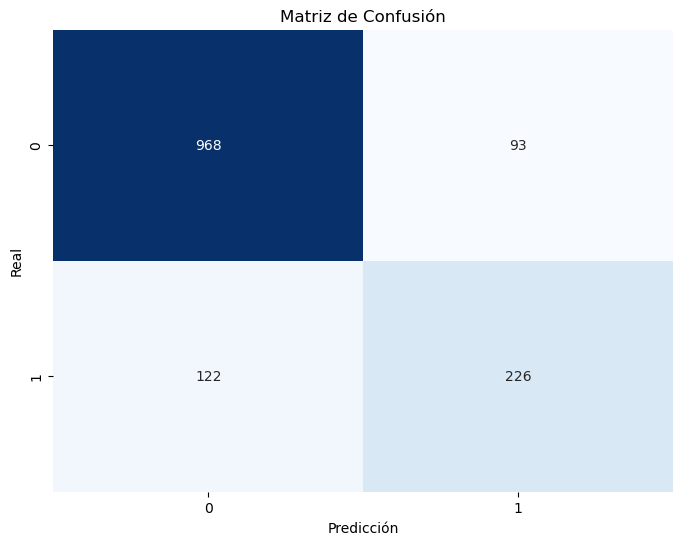

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

- El modelo anterior, nos indica que en el caso de las predicciónes de clientes que se dan de baja(churn 1), el modelo está identificando 122 clientes los cuales los clasifica como que no están de baja cuando no es verdad. Mientras que de los usuarios reales que no se han dado de baja son 93 y el modelo los predice como churn. Se podría decir que no es un buen resultado en este caso.

### Modelo de arbol de clasificación

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [127]:
# definir el modelo

modeloDTC = DecisionTreeClassifier(splitter='best', random_state=1, max_depth=5)

In [128]:
# entrenar el modelo

mod_fitDTC = modeloDTC.fit(X_train, y_train)

In [129]:
# predecir resultados

mod_predDTC = mod_fitDTC.predict(X_val)

In [130]:
# Calcular 

DTC_Accuracy_Score = metrics.accuracy_score(mod_predDTC, y_val)
DTC_JaccardIndex = metrics.jaccard_score(mod_predDTC, y_val)
DTC_F1_Score = metrics.f1_score(mod_predDTC, y_val)
DTC_Log_Loss = metrics.log_loss(mod_predDTC, y_val)

In [131]:
# Informe de clasificación

print("Informe de clasificación:\n", classification_report(y_val, mod_predDTC))

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1061
           1       0.69      0.73      0.71       348

    accuracy                           0.85      1409
   macro avg       0.80      0.81      0.81      1409
weighted avg       0.86      0.85      0.86      1409



#### Modelo KKN

In [115]:
from sklearn.neighbors import KNeighborsRegressor
modeloKNN = KNeighborsRegressor(n_neighbors=4)

In [116]:
mod_KNN = modeloKNN.fit(X_train,y_train)

In [117]:
mod_predKNN = mod_KNN.predict(X_val)

In [118]:
# Convertir regresion por to binario

binary_KNN = [round(pred) for pred in mod_predKNN]

# Calcular 

KNN_Accuracy_Score = metrics.accuracy_score(binary_KNN, y_val)
KNN_JaccardIndex = metrics.jaccard_score(binary_KNN, y_val)
KNN_F1_Score = metrics.f1_score(binary_KNN, y_val)

#### Reporte modelos

In [132]:
Reporte = pd.DataFrame({
    'Model': ['XGBoost','Regresión logística', 'Árbol de clasificación', 'Modelo-KNN'],
    'Accuracy': [xg_Accuracy_Score, LR_Accuracy_Score, DTC_Accuracy_Score, KNN_Accuracy_Score],
    'Jaccard Index': [ xg_JaccardIndex,LR_JaccardIndex, DTC_JaccardIndex, KNN_JaccardIndex],
    'F1 Score': [xg_F1_Score, LR_F1_Score, DTC_F1_Score, KNN_F1_Score],
    'Log Loss': [ None,LR_Log_Loss, DTC_Log_Loss, None]
})
Reporte

,Model,Accuracy,Jaccard Index,F1 Score,Log Loss
0,XGBoost,0.868701,0.576659,0.731495,NaN
1,Regresión logística,0.847410,0.512472,0.677661,5.499919
2,Árbol de clasificación,0.854507,0.554348,0.713287,5.244109
3,Modelo-KNN,0.784954,0.288732,0.448087,NaN


### Gráfica árbol

In [123]:
from sklearn.tree import plot_tree

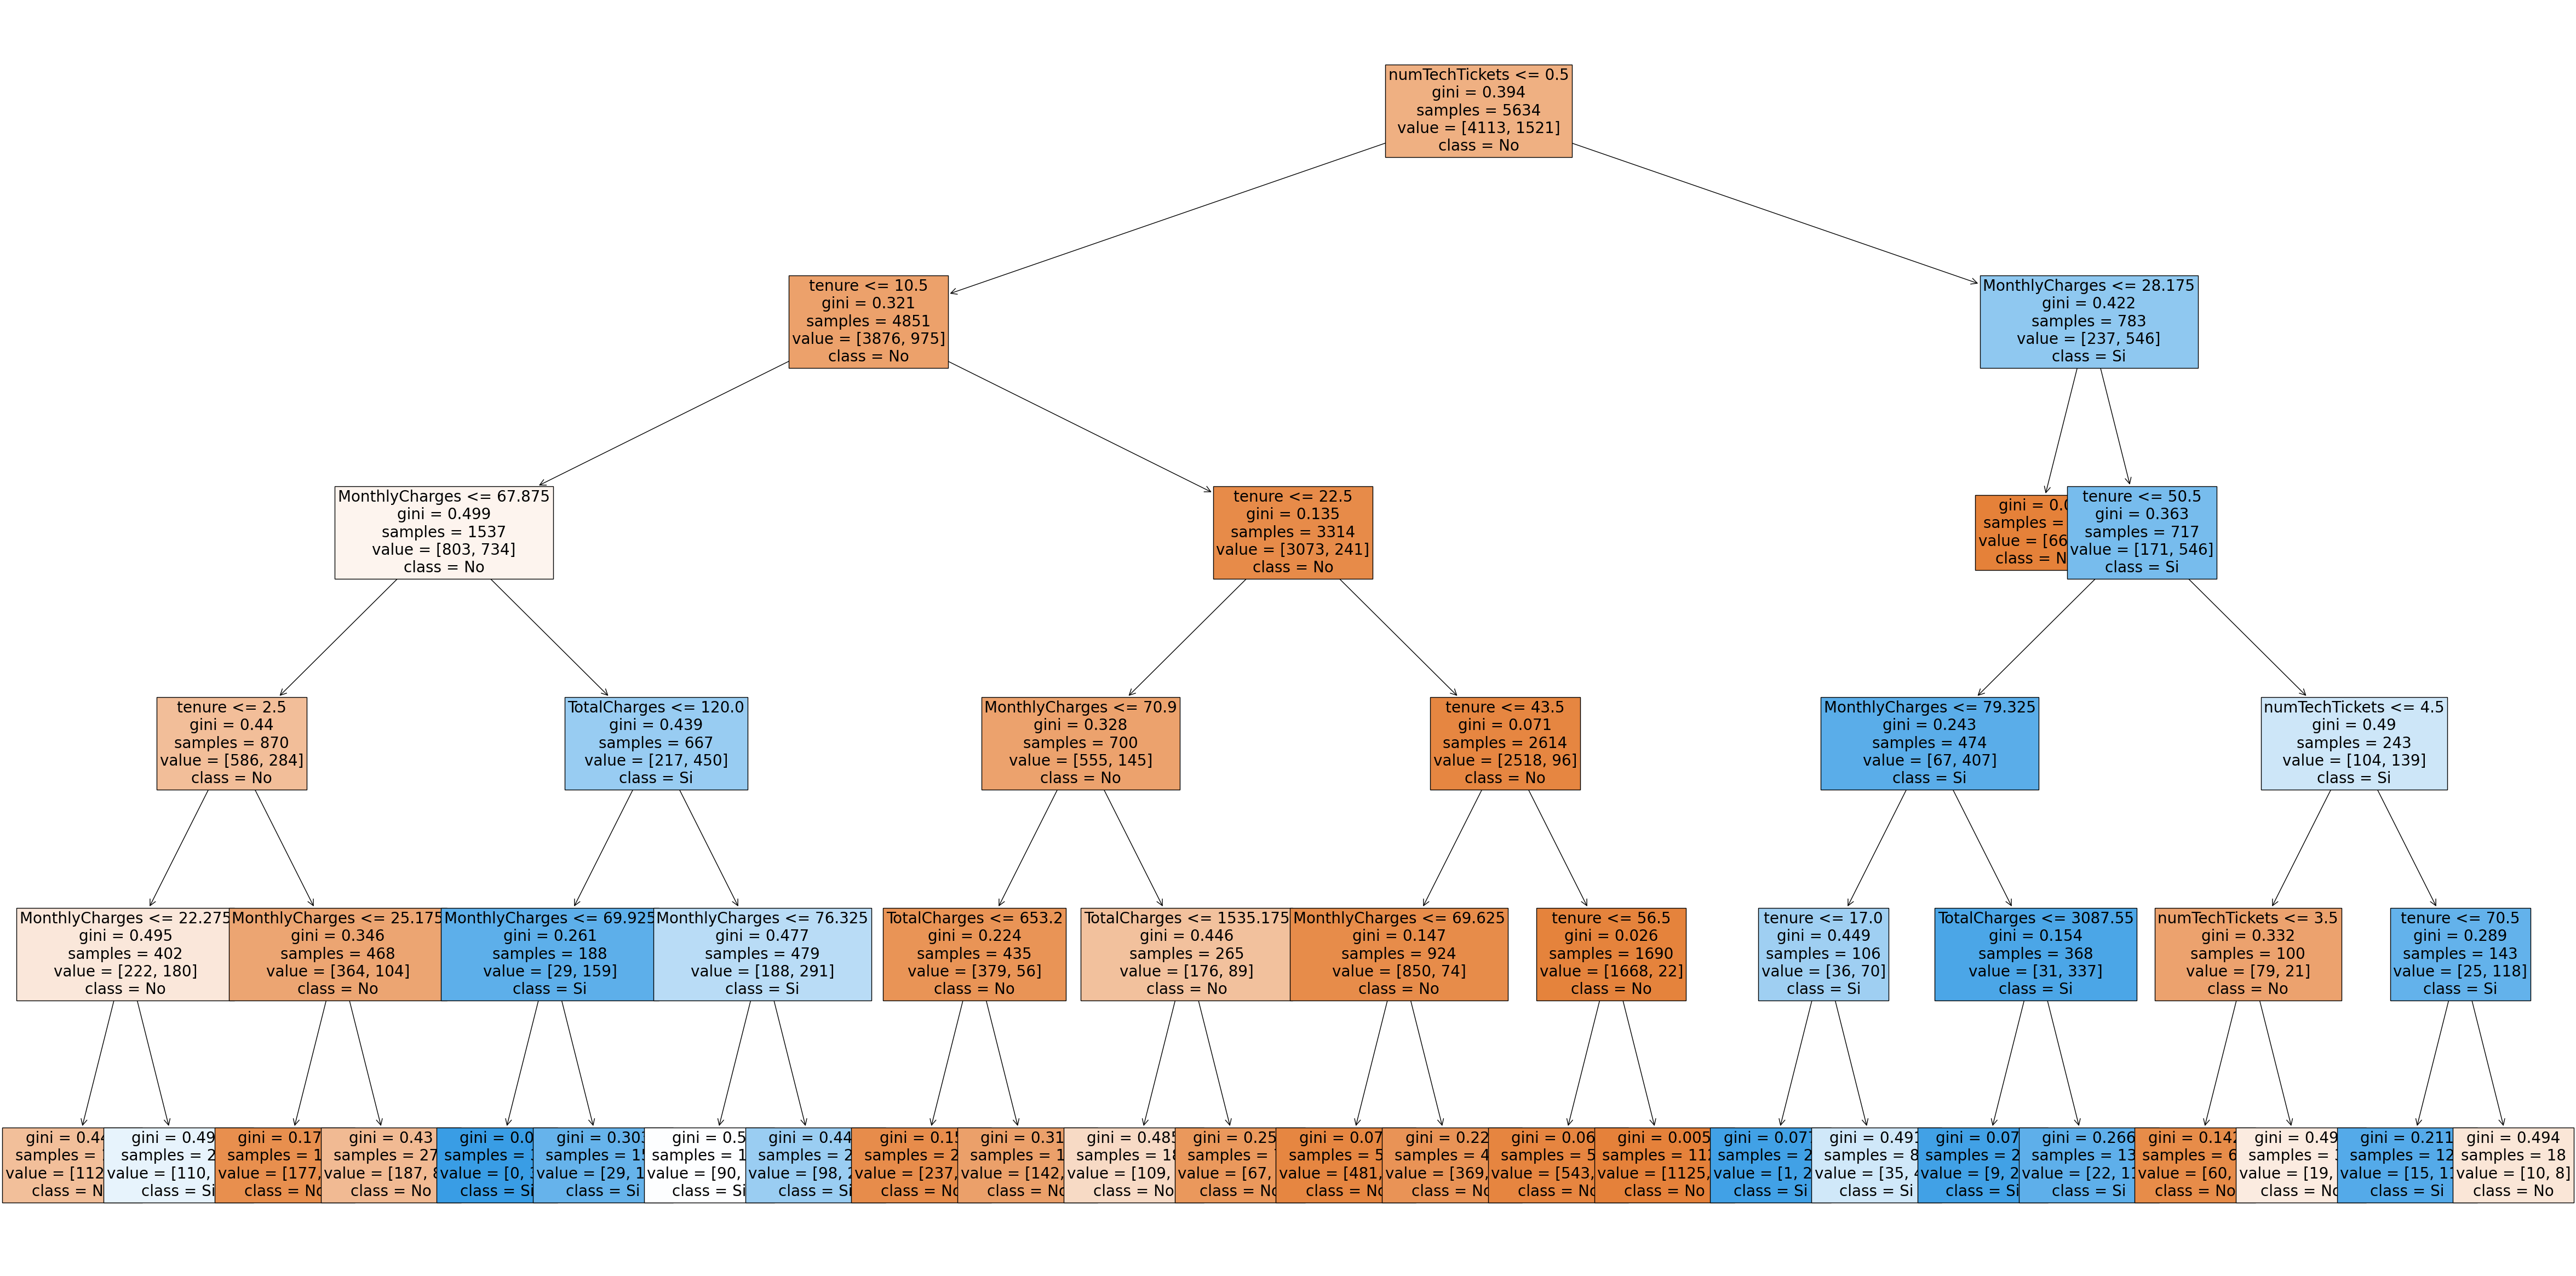

In [161]:
fig = plt.figure(figsize=(60,30))
arbol = plot_tree(modeloDTC, feature_names=X.columns.tolist(),class_names=['No', 'Si'], filled=True, fontsize=20)

- Clientes antiguos (entre 4 y 5 años), con más de 4 ticketissue reportados y con un pago mensual superior a los 79 €, muestran mayor tendencia a darse de baja.
- También muestran mayores posibilidad de baja, aquellos clientes que permanencen hasta los 10 meses, pero que tienen un pago mensual superior a los 67 €, incluso aunque no tengan reportada previamente un ticketissue.
- En cambio, se observa que los clientes que no han reportados ningún ticketissues, y tienen entre año y medio y 2 años y medios; junto con una factura mensual  menor de 55 €, no se dan de baja de la empresa.

## Conclusiones

- Se recomienda identificar a los clientes de mayor antiguedad(se puede por ejemplo mirar el importe de la factura anterior y considerar si es superior a los 79 € que suele ser la media de los clientes más antiguos), para que en los momentos que contacten con el equipo de asistencia técnica y reporten una incidencias, se pueda o bien rectificar la factura emitida durante ese mes; o compensar a esos clientes de otro modo. 


- Otra de las observaciones, sería revisar las tarifas actuales ya que al parecer, el pago mensual tiene un impacto negativo en la retención de los clientes. 

Se puede incluir el modelo de clasificación anteriormente creado, para que en caso de registrar el contacto de estos clientes; el modelo pueda generar una alerta o aviso al agente en cuanto identifique al cliente durante la llamada.